<a href="https://colab.research.google.com/github/Habibu-Ahmad/Modelling_Ribosome_Motion/blob/main/TASEP/density_profile_with_finite_lifetime).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

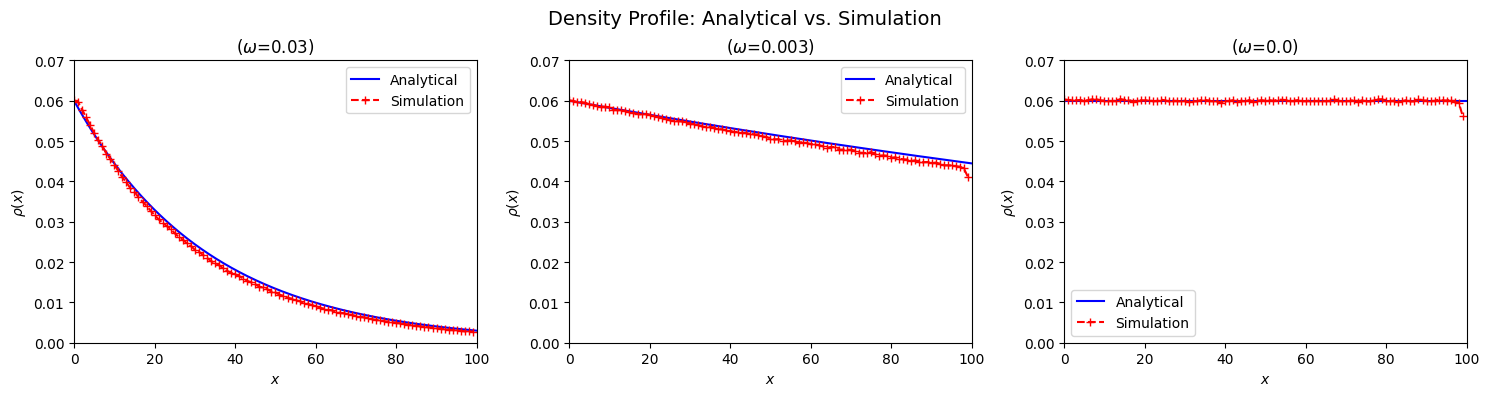

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def step(state, alpha, beta, omega):
    L = len(state)
    x = np.random.choice(L)
    if x == 0:
        if state[x] == 0 and np.random.random() <= alpha:
            state[x] = 1
        elif state[x] == 1 and state[x + 1] == 0:
            state[x] = 0
            state[x + 1] = 1
    elif x == L - 1:
        if np.random.random() <= beta:
            state[L - 1] = 0
    else:
        if state[x] == 1:
            if np.random.random() <= omega:
                state[x] = 0
            elif state[x + 1] == 0:
                state[x] = 0
                state[x + 1] = 1
    return state

def run(L, alpha, beta, omega, Nmax, Ninit):
    state = np.zeros(L, dtype="int")
    n = 0
    rho = np.zeros(L)
    rhocnt = 0
    while n < Nmax:
        state = step(state, alpha, beta, omega)
        if n > Ninit:
            rho = rho + state
            rhocnt += 1
        n += 1
    return rho / rhocnt

L = 100
Nmax = 2700000 * L
Ninit = 100000 * L
alpha = 0.06
beta = 1
omegas = [0.03, 0.003, 0.00]  # Different values of omega

fig, axs = plt.subplots(1, 3, figsize=(15, 4))  # Create three subplots

# Counter for subplot labels
sub_labels = ['a', 'b', 'c']

for i, omega in enumerate(omegas):
    rho_sim = run(L, alpha, beta, omega, Nmax, Ninit)

    # Constants
    p = 1

    # Define the function for analytical density
    def rho_analytical(L):
        return (alpha / p) * np.exp(-omega * (L / p))

    # Generate L values
    L_values = np.linspace(0, 100, 1000)  # Adjust range as needed

    # Calculate analytical density values
    density_values = rho_analytical(L_values)

    # Plot
    axs[i].plot(L_values, density_values, label='Analytical', color='blue')
    axs[i].plot(range(L), rho_sim, label='Simulation', marker = '+', linestyle='--', color='red')
    axs[i].set_title(f'($\omega$={omega})')
    axs[i].set_xlabel(r'$x$')
    axs[i].set_ylabel(r'$\rho(x)$')
    axs[i].set_xlim(0, 100)
    axs[i].set_ylim(0, 0.07)
    axs[i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave room for suptitle
plt.suptitle('Density Profile: Analytical vs. Simulation', fontsize=14)
plt.show()

